In [ ]:
!ls '/content/gdrive/My Drive/dataset3'

falencias


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

Dataset 1 /falencias

In [ ]:
dataset1f = '/content/gdrive/My Drive/dataset1/falencias'

root1f, dirs1r, files1f = next(os.walk(dataset1f))

nfiles1f = len(files1f)

size1f = 0
for each in files1f:
  size1f = size1f + os.path.getsize(os.path.join(root1f, each))

print(nfiles1f)
print(size1f)

Dataset /recuperacoes_judiciais

In [ ]:
dataset1r = '/content/gdrive/My Drive/dataset1/recuperacoes_judiciais'

root1r, dirs1r, files1r = next(os.walk(dataset1r))

nfiles1r = len(files1r)

size1r = 0
for each in files1r:
  size1r = size1r + os.path.getsize(os.path.join(root1r, each))

print(nfiles1r)
print(size1r)

2896
181990720


Dataset 2 /falencias

In [ ]:
dataset2f = '/content/gdrive/My Drive/dataset2/falencias'

root2f, dirs2f, files2f = next(os.walk(dataset2f))

nfiles2f = 0
size2f = 0
for each_dir in dirs2f:
  sub_path = os.path.join(root2f, each_dir)
  sub_root, sub_dirs, sub_files = next(os.walk(sub_path))
  while not sub_dirs:
    nfiles2f = nfiles2f + len(sub_files)
    for each_file in sub_files:
      size2f = size2f + os.path.getsize(os.path.join(sub_root, each_file))


print(nfiles2f)
print(size2f)
print(totalz2f)

In [ ]:
import zipfile
import os

def ZipCounter(path):

    subtotal = 0
    root, dirs, files = next(os.walk(path))

    if dirs:
        for each in dirs:
            subtotal = subtotal + ZipCounter(os.path.join(root, each))
#    else:
    for each in files:
        f = os.path.join(root, each)
        if zipfile.is_zipfile(f):
            subtotal = subtotal + len(zipfile.ZipFile(f).infolist())
    return(subtotal)

In [ ]:
dataset2f = '/content/gdrive/My Drive/dataset2/falencias'

inzip_total = ZipCounter(dataset2f)
print(inzip_total)

588140


In [ ]:
def PDFCounter(path):

    subtotal = 0
    root, dirs, files = next(os.walk(path))

    if dirs:
        for each in dirs:
            subtotal = subtotal + PDFCounter(os.path.join(root, each))
#    else:
    for each in files:
        #f = os.path.join(root, each)
        ext = os.path.splitext(each)
        if ext[-1] == '.pdf':
            subtotal += 1

    return(subtotal)

In [ ]:
dataset2f = '/content/gdrive/Shared drives/NLP Jurídico - Lab. Ciência de Dados/Dados PDFs Falencias'

pdf_total = PDFCounter(dataset2f)
print(pdf_total)

418101


In [ ]:
dataset2f = '/content/gdrive/Shared drives/NLP Jurídico - Lab. Ciência de Dados/Dados PDFs Falencias'

root2f, dirs2f, files2f = next(os.walk(dataset2f))
nfiles2f = len(dirs2f)

nfiles2f = 0
size2f = 0
for each_dir in dirs2f:
  sub_path = os.path.join(root2f, each_dir)
  sub_root, sub_dirs, sub_files = next(os.walk(sub_path))
  nfiles2f = nfiles2f + len(sub_files)
  for each_file in sub_files:
    size2f = size2f + os.path.getsize(os.path.join(sub_root, each_file))

print(nfiles2f)
print(size2f)

3192
['1083182-96.2016.8.26.0100', '1084043-53.2014.8.26.0100', '1084253-36.2016.8.26.0100', '1084343-10.2017.8.26.0100', '1084414-46.2016.8.26.0100', '1084439-30.2014.8.26.0100', '1084532-85.2017.8.26.0100', '1084759-80.2014.8.26.0100', '1085022-44.2016.8.26.0100', '1085089-72.2017.8.26.0100', '1085098-39.2014.8.26.0100', '0020557-09.2017.8.26.0100', '1085139-98.2017.8.26.0100', '1085688-11.2017.8.26.0100', '1085721-35.2016.8.26.0100', '1085994-77.2017.8.26.0100', '1086148-32.2016.8.26.0100', '1086224-27.2014.8.26.0100', '1086428-71.2014.8.26.0100', '1086487-88.2016.8.26.0100', '1086707-52.2017.8.26.0100', '1086934-47.2014.8.26.0100', '1087358-21.2016.8.26.0100', '0022593-70.2017.8.26.0602', '1087467-35.2016.8.26.0100', '1087473-08.2017.8.26.0100', '1087488-79.2014.8.26.0100', '1087529-41.2017.8.26.0100', '1087576-49.2016.8.26.0100', '0025432-27.2014.8.26.0100', '1087640-25.2017.8.26.0100', '1087685-68.2013.8.26.0100', '1087748-54.2017.8.26.0100', '1087858-87.2016.8.26.0100', '1087861

Coleta de dados dos processos

In [ ]:
import csv
import sys
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Increase field size to fit the HTML code with the csv reader
csv.field_size_limit(sys.maxsize)

131072

In [ ]:
dataset1f = '/content/gdrive/Shared drives/NLP Jurídico - Lab. Ciência de Dados/falencias.csv'

# Regex to find keywords
regex_valor = '([Vv]alor\s[Dd]a\sa[cç][aã]o.\D*)(\d+\D?\d+,\d+)(.*$)'
regex_juiz = '([Jj]uiz[^A-Za-z])([<{1}][^>]*[>{1}]\s*)*([A-Za-z\s]*)([<{1}])'
regex_assunto = '([Aa]ssunto[^A-Za-z])([<{1}][^>]*[>{1}]\s*)*([A-Za-z\s]*)([<{1}])'
regex_outass = '([Oo]utros\s*[Aa]ssuntos[^A-Za-z])([<{1}][^>]*[>{1}]\s*)*([^<]*)([<{1}])'

replace_list = ['\\n', '\\t']
valor_procs = []
juizes = []
assuntos = []
with open(dataset1f) as file:
    csv_file = csv.reader(file, delimiter=",")
    for row in csv_file:
        # row[1] is the HTML
        txt = row[1]
        # HTML contains \n and \t, removing to make the regex easier
        for each in replace_list:
            txt = txt.replace(each, ' ')
        # Search for valor
        match = re.search(regex_valor, txt, re.MULTILINE)
        if match:
            val = match.group(2).replace('.', '')
            val = float(val.replace(',', '.'))
            valor_procs.append(val)
        # Search for juiz
        match = re.search(regex_juiz, txt, re.MULTILINE)
        if match:
            juizes.append(match.group(3).upper())
        # Search for assuntos
        aux = []
        match = re.search(regex_assunto, txt, re.MULTILINE)
        if match:
            aux.append(match.group(3).upper())
        match = re.search(regex_outass, txt, re.MULTILINE)
        if match:
            aux.append(match.group(3).upper())
        assuntos.append(aux)

([<matplotlib.patches.Wedge at 0x7fee750bb9e8>,
 [Text(0.98833070237898, 0.48291036718533203, 'PAULO FURTADO DE OLIVEIRA FILHO'),
  Text(0.2716464487701799, 1.0659306763906131, 'TIAGO HENRIQUES PAPATERRA LIMONGI'),
  Text(-0.5938906567444583, 0.9259016620741298, 'Processos sem juiz vinculado'),
  Text(-0.9820182226789039, 0.4956210349920256, 'JOAO DE OLIVEIRA RODRIGUES FILHO'),
  Text(-1.0644007366619501, 0.2775807482400359, 'MARCELO BARBOSA SACRAMONE'),
  Text(-1.0884799766172797, 0.15878079387396551, 'JOAO AUGUSTO GARCIA'),
  Text(-1.0944735390230262, 0.11012571170445444, 'THIAGO HENRIQUE TELES LOPES'),
  Text(-0.04353213954004872, -1.09913827739146, 'Outros')],
 [Text(0.5390894740248982, 0.26340565482836287, '14.5%'),
  Text(0.14817079023827995, 0.581416732576698, '13.1%'),
  Text(-0.32394035822424994, 0.5050372702222526, '13.0%'),
  Text(-0.5356463032794021, 0.2703387463592867, '4.0%'),
  Text(-0.5805822199974273, 0.15140768085820142, '2.8%'),
  Text(-0.5937163508821525, 0.08660770

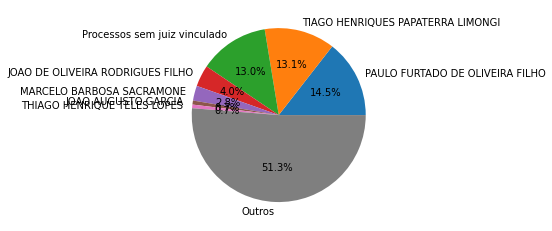

In [ ]:
juizes = np.array(juizes)

judges, frequency = np.unique(juizes, return_counts=True)

df = pd.DataFrame(data={'judges': judges, 'freq': frequency})

no_judges = 7

df = df.sort_values(by=['freq'], ascending=False)

total = df.sum()['freq']

partial_total = df[:7].sum()['freq']

df = df[:7].append(pd.DataFrame({'judges': ['Outros'], 'freq': [total - partial_total]}))

df.reset_index(drop=True, inplace=True)
df.at[2, 'judges'] = 'Processos sem juiz vinculado'
plt.pie(x=df['freq'], labels=df['judges'], autopct='%1.1f%%')

#df

In [ ]:
dataset1f = '/content/gdrive/Shared drives/NLP Jurídico - Lab. Ciência de Dados/recuperacoes_judiciais.csv'

regex_mov = '(<tbody id="tabelaUltimasMovimentacoes">\s*)(.*)(<!-- Tabela de petições diversas -->)'
regex_html = '<.*?>'
regex_trim = '(\s{3,})'
regex_replace = '~_~'
regex_date = '(\s{3,}\d{2}/\d{2}/\d{4}\s{3,})'
regex_split = '(~_~)'
replace_list = ['\\n', '\\t']
regex_iter = '\d{2}/\d{2}/\d{4}'

df_columns = ['n_processo', 'data', 'movimentação']
mov = []

with open(dataset1f) as file:
    csv_file = csv.reader(file, delimiter=",")
    for row in csv_file:
        nproc = row[0]
        txt = row[1]
        for each in replace_list:
            txt = txt.replace(each, ' ')
        match = re.search(regex_mov, txt, re.MULTILINE)
        if match:
            txt = match.group(2)
            txt_aux = re.compile(regex_html)
            txt = re.sub(txt_aux, '', txt)
            txt = re.sub(regex_trim, regex_replace, txt)
            txt = re.split(regex_split, txt)
            txt = list(filter(None, txt))
            txt = list(filter(lambda x: x != regex_replace, txt))
            list_mov = iter(txt)
            i = next(list_mov, '0')
            while i != 0:
                if re.match(regex_iter, i, re.MULTILINE):
                    date = i
                    string = ''
                    i = next(list_mov, 0)
                    while not (i == 0 or re.match(regex_iter, i, re.MULTILINE)):
                        string = ''.join(i)
                        i = next(list_mov, 0)
                    mov_aux = [0, date, string]
                    mov.append(mov_aux)

df_mov = pd.DataFrame(mov, columns = df_columns)

A saída de streaming foi truncada nas últimas 5000 linhas.
[0, '14/06/2017', '0020773-83.2017.8.26.0224 - Habilitação de Crédito']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Certidão - Genérica']
[0, '14/06/2017', '0020770-31.2017.8.26.0224 - Habilitação de Crédito']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Certidão - Genérica']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Certidão - Genérica']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Certidão - Genérica']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Certidão - Genérica']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Certidão - Genérica']
[0, '14/06/2017', 'Documento Juntado']
[0, '14/06/2017', 'Documento Juntado']
[0, '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.
[0, '10/02/2017', 'Vistos.1) Fl. 544/567: Ciência aos credores, eventuais interessados e Ministério Público do relatório apresentado pelo administrador judicial, opinando pelo encerramento da falência. 2) Fl. 569/580 (habilitação de crédito de JOSELITA CONCEIÇÃO VIANA): A via é incorreta. Promova o peticionante a distribuição do incidente adequado, através do site do Tribunal de Justiça - peticionamento eletrônico de 1º grau - petição intermediária de 1º Grau - Categoria: Inc. Processual - Tipo de petição código 111 - Habilitação de Crédito.Int.']
[0, '09/02/2017', 'Conclusos para Decisão']
[0, '19/01/2017', 'Nº Protocolo: WJMJ.17.40028206-9 Tipo da Petição: Pedido de Habilitação Data: 19/01/2017 10:40']
[0, '28/11/2016', 'Relação :0389/2016 Data da Disponibilização: 28/11/2016 Data da Publicação: 29/11/2016 Número do Diário: 2248 Página: 964/978']
[0, '25/11/2016', "Relação: 0389/2016 Teor do ato: Vistos.Fls. 535/542: Fica adi

KeyboardInterrupt: ignored

In [ ]:
df_mov
#movs = df_mov['movimentação'].to_numpy()
#movs.shape

,n_processo,data,movimentação


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text  = '\n'.join(map(str, movs))

wordcloud = WordCloud(width=900, height=200).generate(text)

NameError: ignored

(-0.5, 899.5, 199.5, -0.5)

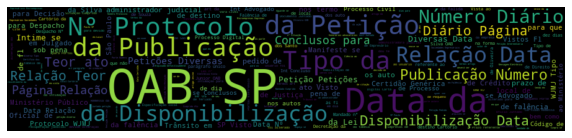

In [ ]:
# Display the generated image:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

# Statistics from the full Dataframe

In [2]:
#Import packages
import seaborn as sns
import re
import string
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

pd.set_option('display.max_rows', 500)

In [6]:
data = '/content/drive/Shared drives/NLP Jurídico 2/dataset2/dados_pdf_falencias.csv'

df = pd.read_csv(data)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
len(df['tipo_documento'])

25011944

### Obtain file size of each process (number of pages)

In [8]:
df['n_paginas'] =  df['n_folha_fim'] - df['n_folha_inicio'] +  1
df.head()

,Unnamed: 0,n_processo,tipo_documento,string,data_doc,assinado_por,n_folha_inicio,n_folha_fim,n_paginas
0,0,0000163-68.2013.8.26.0666,acórdão,fls. 108fls. 34poder judiciário71registro: 201...,NaN,geraldo francisco pinheiro franco. para acessa...,108.0,108.0,1.0
1,1,0000163-68.2013.8.26.0666,acórdão,fls. 109fls. 35poder judiciáriosuscitante : mm...,NaN,geraldo francisco pinheiro franco. para acessa...,109.0,109.0,1.0
2,2,0000163-68.2013.8.26.0666,acórdão,fls. 110fls. 36poder judiciáriorelata o juízo ...,NaN,geraldo francisco pinheiro franco. para acessa...,110.0,110.0,1.0
3,3,0000163-68.2013.8.26.0666,acórdão,"fls. 111fls. 37poder judiciáriocom efeito, con...",NaN,geraldo francisco pinheiro franco. para acessa...,111.0,111.0,1.0
4,4,0000163-68.2013.8.26.0666,ato ordinatório,fls. 127ato ordinatórioprocesso n°:classe assu...,18/01/2017,seni seemund nunes e edmilson de souza nogueira,127.0,127.0,1.0


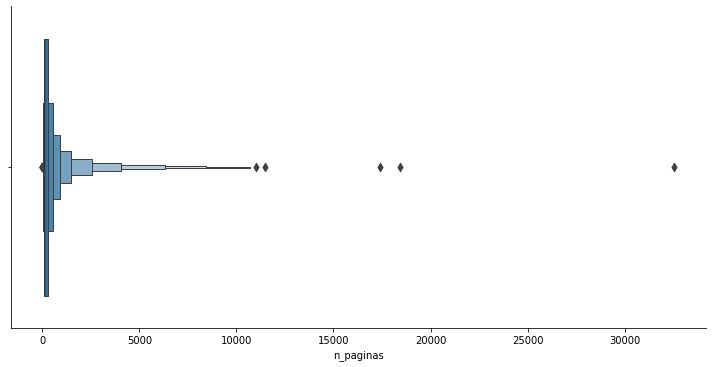

In [61]:
sns.catplot(x="n_paginas", kind="boxen", data=df.groupby('n_processo')['n_paginas'].sum().to_frame(), height=5, aspect=2);

In [55]:
df2 = df.groupby('n_processo')['n_paginas'].sum().to_frame()
df2.head()

,n_paginas
n_processo,
0000163-68.2013.8.26.0666,152.0
0000786-76.2015.8.26.0177,766.0
0001302-07.2013.8.26.0100,330.0
0002368-23.2015.8.26.0659,256.0
0002441-30.2015.8.26.0615,83.0


In [57]:
mask = (df2['n_paginas'] > 15000)
df2 = df2.loc[~mask]

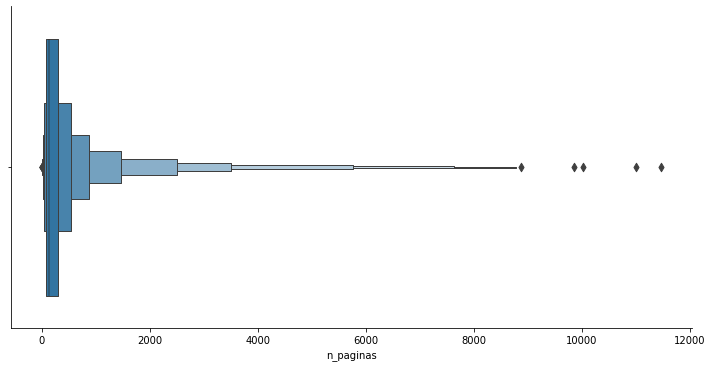

In [58]:
sns.catplot(x="n_paginas", kind="boxen", data=df2, height=5, aspect=2);

Text(0.5, 6.799999999999997, 'Nº de Páginas')

<Figure size 1080x360 with 0 Axes>

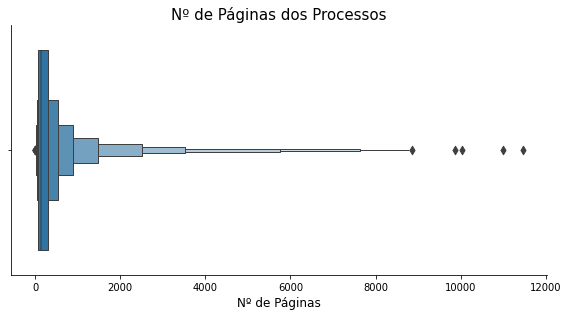

In [68]:
plt.figure(figsize=(15,5))
sns.catplot(x="n_paginas", kind="boxen", data=df2, height=4, aspect=2)
plt.xticks(fontsize=10)
plt.title("Nº de Páginas dos Processos",fontsize=15)
plt.xlabel("Nº de Páginas",fontsize=12)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

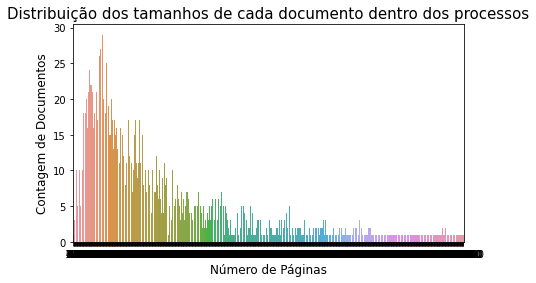

In [65]:
plt.figure(figsize=(7,4))
sns.countplot(df.groupby('n_processo')['n_paginas'].sum())
plt.xticks(fontsize=10)
plt.title("Distribuição dos tamanhos de cada documento dentro dos processos",fontsize=15)
plt.xlabel("Número de Páginas",fontsize=12)
plt.ylabel("Contagem de Documentos", fontsize=12)
plt.yticks(fontsize=10)

In [ ]:
sns.catplot(x="n_paginas", kind="boxen", data=df.groupby('n_processo')['n_paginas'].sum().to_frame().loc[~(df['n_paginas'])], height=5, aspect=2);

### Obtain descriptive stats about each type of document

In [51]:
df['tipo_documento'].value_counts()

documento 1                                                     888909
certidões de cartório                                            76284
petição                                                          58698
documentos                                                       39990
ofício recebido                                                  28463
ofícios                                                          20353
ato ordinatório                                                  18816
documento 2                                                      18015
documentos diversos                                              17165
guia de custas                                                   17089
decisão                                                          16315
despachos                                                        13451
procuração                                                       12594
documento 3                                                      11776
docume

In [55]:
df.head(10)

,Unnamed: 0,n_processo,tipo_documento,string,data_doc,assinado_por,n_folha_inicio,n_folha_fim,n_paginas
0,0,0000163-68.2013.8.26.0666,acórdão,fls. 108fls. 34poder judiciário71registro: 201...,NaN,geraldo francisco pinheiro franco. para acessa...,108.0,108.0,1.0
1,1,0000163-68.2013.8.26.0666,acórdão,fls. 109fls. 35poder judiciáriosuscitante : mm...,NaN,geraldo francisco pinheiro franco. para acessa...,109.0,109.0,1.0
2,2,0000163-68.2013.8.26.0666,acórdão,fls. 110fls. 36poder judiciáriorelata o juízo ...,NaN,geraldo francisco pinheiro franco. para acessa...,110.0,110.0,1.0
3,3,0000163-68.2013.8.26.0666,acórdão,"fls. 111fls. 37poder judiciáriocom efeito, con...",NaN,geraldo francisco pinheiro franco. para acessa...,111.0,111.0,1.0
4,4,0000163-68.2013.8.26.0666,ato ordinatório,fls. 127ato ordinatórioprocesso n°:classe assu...,18/01/2017,seni seemund nunes e edmilson de souza nogueira,127.0,127.0,1.0
5,5,0000163-68.2013.8.26.0666,ato ordinatório,fls. 129ato ordinatórioprocesso digital nº:cla...,17/05/2017,terume regina koyama,129.0,129.0,1.0
6,6,0000163-68.2013.8.26.0666,ato ordinatório,fls. 144ato ordinatórioprocesso digital nº:cla...,24/05/2017,edmilson de souza nogueira,144.0,144.0,1.0
7,7,0000163-68.2013.8.26.0666,aviso de recebimento,"este documento é cópia do original, assinado d...",25/09/2017,v-post.correios.com.br,150.0,150.0,1.0
8,8,0000163-68.2013.8.26.0666,carta precatória,"este documento é cópia do original, assinado d...",24/05/2017,roberto di giaimo junior,131.0,131.0,1.0
9,9,0000163-68.2013.8.26.0666,carta precatória,"este documento é cópia do original, assinado d...",24/05/2017,roberto di giaimo junior,132.0,132.0,1.0


In [9]:
df['tipo_documento']=df['tipo_documento'].str.lower()
df['tipo_documento']=df['tipo_documento'].str.replace('documentos','outros documentos')
df['tipo_documento']=df['tipo_documento'].apply(lambda x:re.sub(r'documento\s+\d{1,2}','outros documentos',str(x)))
df['tipo_documento']=df['tipo_documento'].str.replace('agravoinstrumento acórdãopeçasjuntados c trânsitojulgado','agravo instr. acórdão peças junt. c/ trânsito julgado')
df['tipo_documento']=df['tipo_documento'].str.replace('documento 1','outros documentos')
df['tipo_documento']=df['tipo_documento'].str.replace('ofício recebido','ofícios')
df['tipo_documento']=df['tipo_documento'].str.replace('outros documentos diversos','outros documentos')
df['tipo_documento']=df['tipo_documento'].str.replace('ofício','ofícios')

In [11]:
df['tipo_documento']=df['tipo_documento'].str.replace('nan','outros documentos')
df['tipo_documento']=df['tipo_documento'].str.replace('ofícioss','ofícios')

In [23]:
df['tipo_documento']=df['tipo_documento'].str.replace('agravo instr. acórdão peças junt. c/ trânsito julgado', 'agravo instrumento')

In [25]:
df['tipo_documento'].value_counts().index[0:11]

Index(['outros documentos', 'certidões de cartório', 'petição', 'ofícios',
       'ato ordinatório', 'guia de custas', 'decisão', 'despachos',
       'procuração', 'mandados', 'agravo instrumento'],
      dtype='object')

In [26]:
df['tipo_documento'][df['tipo_documento'].isin(df['tipo_documento'].value_counts().index[:11])]

4                 ato ordinatório
5                 ato ordinatório
6                 ato ordinatório
27          certidões de cartório
28          certidões de cartório
                    ...          
25011927                  petição
25011928                  petição
25011929                  petição
25011930                  petição
25011931               procuração
Name: tipo_documento, Length: 24914044, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

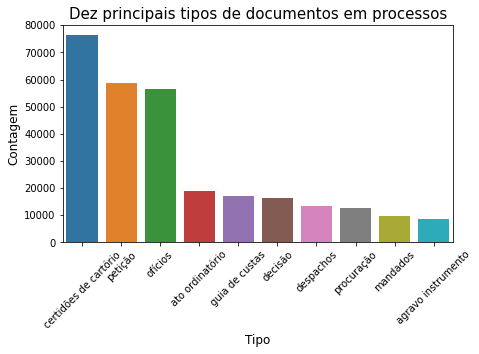

In [27]:
plt.figure(figsize=(7,4))
sns.countplot(df['tipo_documento'][df['tipo_documento'].isin(df['tipo_documento'].value_counts().index[1:11])],order=df['tipo_documento'].value_counts().index[1:11])
plt.xticks(rotation=45,fontsize=10)
plt.title("Dez principais tipos de documentos em processos",fontsize=15)
plt.xlabel("Tipo",fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.yticks(fontsize=10)

In [32]:
df1 = df[['tipo_documento','n_paginas']][df['tipo_documento'].isin(df['tipo_documento'].value_counts().index[1:11])]

,tipo_documento,n_paginas
4,ato ordinatório,1.0
5,ato ordinatório,1.0
6,ato ordinatório,1.0
27,certidões de cartório,1.0
28,certidões de cartório,1.0


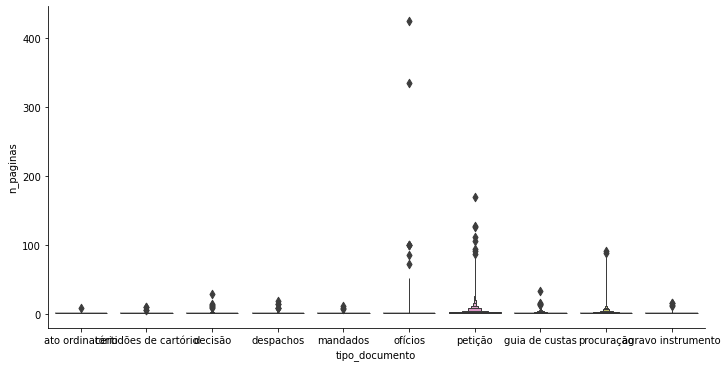

In [43]:
sns.catplot(x="tipo_documento", y="n_paginas", kind="boxen", data=df1, height=5, aspect=2)

In [47]:
#mask = (d1['Diametrofio1'] < .71) | (df_final['Diametrofio2'] < .71) & ((df_final['Nfio1'] + df_final['Nfio2']) > 2)
mask = (df1['n_paginas'] > 50)
df1 = df1.loc[~mask]

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 1080x360 with 0 Axes>

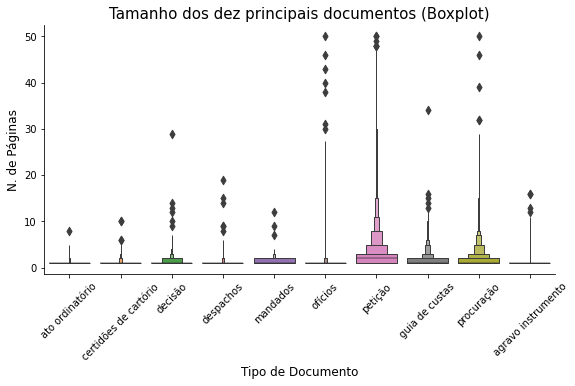

In [67]:
plt.figure(figsize=(15,5))
sns.catplot(x="tipo_documento", y="n_paginas", kind="boxen", data=df1, height=4, aspect=2)
plt.xticks(rotation=45,fontsize=10)
plt.title("Tamanho dos dez principais documentos (Boxplot)",fontsize=15)
plt.xlabel("Tipo de Documento",fontsize=12)
plt.ylabel("N. de Páginas", fontsize=12)
plt.yticks(fontsize=10)

### Obtain stats about judicial decisions